In [1]:
# Importing important libraries and modules
import cv2
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dropout, Conv2D, Dense, BatchNormalization, AveragePooling2D, MaxPooling2D, Flatten
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from zipfile import ZipFile

In [2]:
# Extracting the training data and test data for prediction from the zip file

# for training data
with ZipFile('../input/dogs-vs-cats/train.zip', 'r') as zip: 
    print('Extracting all the files for training data now...') 
    zip.extractall() 
    print('Done!')
    
# for test data for prediction   
with ZipFile('../input/dogs-vs-cats/test1.zip', 'r') as zip: 
    print('Extracting all the files for test data for prediction now...') 
    zip.extractall() 
    print('Done!')    
            

Extracting all the files for training data now...
Done!
Extracting all the files for test data for prediction now...
Done!


In [3]:
# We have to read the training data from a file which contains data in the form of image. 
# The folder is named as 'train' and it contains images of dogs and cats

# First of all we will extract the detail of all the data and save all of them in terms of dataframe with foldername, imagename, objectname and labels
detail = glob.glob("./train/*")
foldername = [str(i.split("n/")[0]) + "n" for i in detail]
imagename = [str(i.split("/")[2]) for i in detail]
objectname = [str(i.split(".")[0]) for i in imagename]
label = [1 if i == 'dog' else 0 for i in objectname]

# Defining dataframe and saving all the extracted information in that dataframe
train_data_detail = pd.DataFrame() 
train_data_detail["foldername"] = foldername
train_data_detail["imagename"] = imagename
train_data_detail["objectname"] = objectname
train_data_detail["label"] = label

# Shuffling of all the classes present in that dataframe
train_data_detail.reset_index(inplace = True, drop = True)  

# Analying the train data detail
print("\nNumber of images in training set = "+str(len(detail)))
print(train_data_detail.columns)
train_data_detail.head()


Number of images in training set = 25000
Index(['foldername', 'imagename', 'objectname', 'label'], dtype='object')


,foldername,imagename,objectname,label
0,./train,dog.7053.jpg,dog,1
1,./train,dog.4185.jpg,dog,1
2,./train,cat.7390.jpg,cat,0
3,./train,cat.4231.jpg,cat,0
4,./train,dog.2934.jpg,dog,1


In [4]:
# Splitting training set into initial training set and test set
train_data_detail, test_data_detail = train_test_split(train_data_detail, stratify=train_data_detail["label"], test_size = 0.08)

# Splitting training data into final training set and cross validation set
train_data_detail, cv_data_detail = train_test_split(train_data_detail, stratify=train_data_detail["label"], test_size = 0.086956)
train_data_detail.shape, test_data_detail.shape, cv_data_detail.shape

((21000, 4), (2000, 4), (2000, 4))

In [5]:
# Resetting index of train, cross validation and test set
train_data_detail.reset_index(inplace = True, drop = True)
cv_data_detail.reset_index(inplace = True, drop = True)
test_data_detail.reset_index(inplace = True, drop = True)

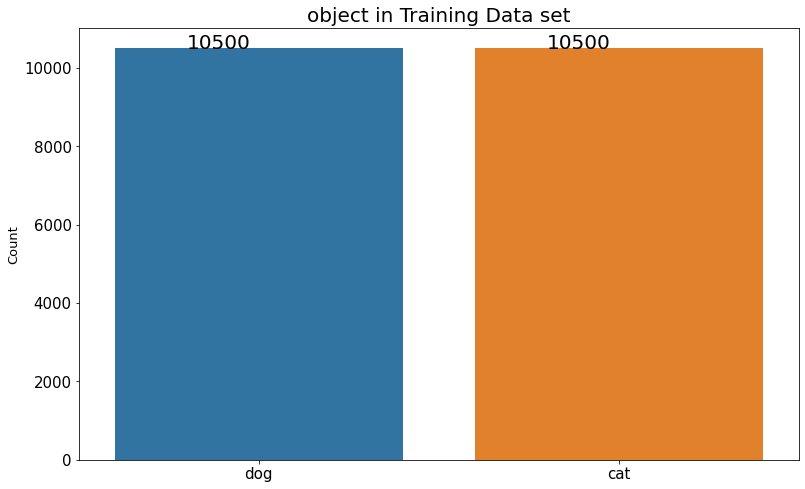

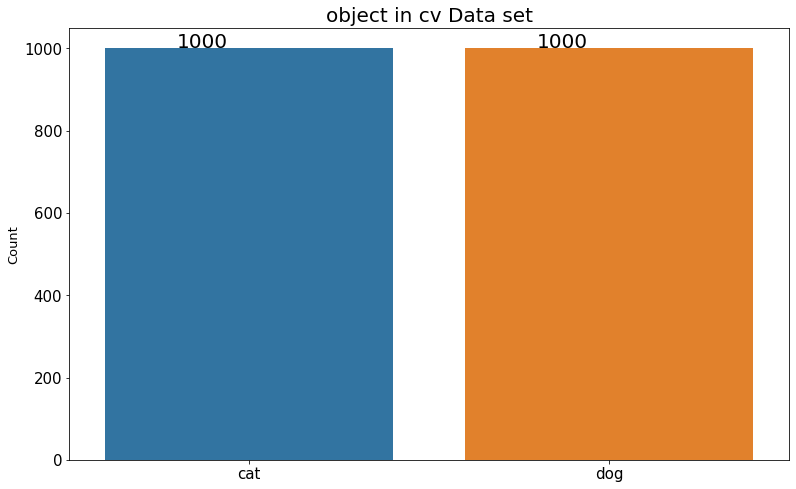

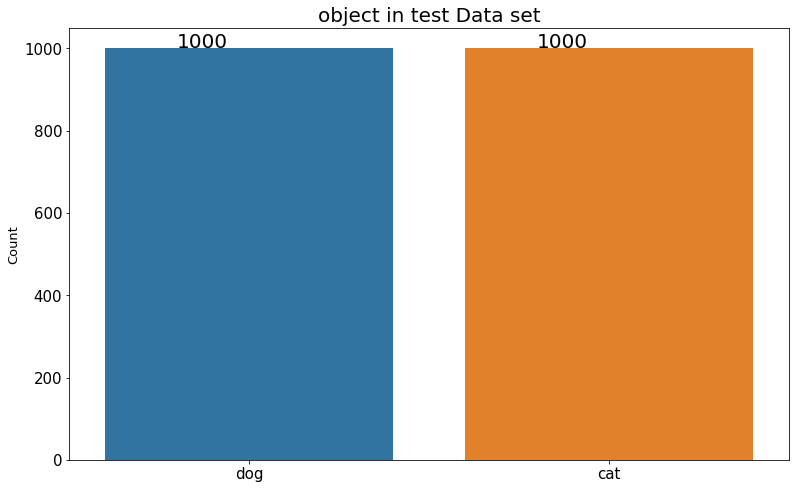

In [6]:
# plotting  and printing distribution of each class in all train, cross validation and test set

# for training data.................................................................................................................
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("object in Training Data set", fontsize = 20)
sns.countplot(x = "objectname", data = train_data_detail)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "black")
plt.xlabel("")
plt.ylabel("Count", fontsize = 13)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 0)
plt.show()

# for cross validation data............................................................................................................
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("object in cv Data set", fontsize = 20)
sns.countplot(x = "objectname", data = cv_data_detail)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "black")
plt.xlabel("")
plt.ylabel("Count", fontsize = 13)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 0)
plt.show()

# for test data............................................................................................................................
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("object in test Data set", fontsize = 20)
sns.countplot(x = "objectname", data = test_data_detail)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "black")
plt.xlabel("")
plt.ylabel("Count", fontsize = 13)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 0)
plt.show()

In [7]:
# Changing the data into an array of pixels and labels so that it can be fed into the model expect test which is for prediction only
# Initially it was in the form of a DataFrame

# for training data
train_x = []
train_y = []
for i in range(len(train_data_detail)):
        path1 = train_data_detail["foldername"][i]
        path2 = train_data_detail["imagename"][i]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        #here, we are normalizing the images
        norm_image = image/255.0 
        #Creating and saving each image in the form of numerical data in an array 
        train_x.append(norm_image)
        #appending corresponding labels 
        train_y.append(train_data_detail['label'][i])  
train_x = np.array(train_x)
train_y = np.array(train_y)
print(" for training data ", train_x.shape, train_y.shape)

# for test data
cv_x = []
cv_y = []
for i in range(len(cv_data_detail)):
        path1 = cv_data_detail["foldername"][i]
        path2 = cv_data_detail["imagename"][i]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        #here, we are normalizing the images
        norm_image = image/255.0 
        #Creating and saving each image in the form of numerical data in an array 
        cv_x.append(norm_image)
        #appending corresponding labels 
        cv_y.append(cv_data_detail['label'][i])  
cv_x = np.array(cv_x)
cv_y = np.array(cv_y)
print(" for cv data ",cv_x.shape, cv_y.shape)

# for cv data
test_x = []
test_y = []
for i in range(len(test_data_detail)):
        path1 = test_data_detail["foldername"][i]
        path2 = test_data_detail["imagename"][i]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        #here, we are normalizing the images
        norm_image = image/255.0 
        #Creating and saving each image in the form of numerical data in an array 
        test_x.append(norm_image)
        #appending corresponding labels 
        test_y.append(test_data_detail['label'][i])  
test_x = np.array(test_x)
test_y = np.array(test_y)
print(" for test data ",test_x.shape, test_y.shape)

 for training data  (21000, 128, 128) (21000,)
 for cv data  (2000, 128, 128) (2000,)
 for test data  (2000, 128, 128) (2000,)


0


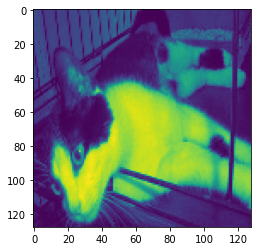

In [8]:
# Checking the accuracy after processing
r = 10000
plt.imshow(train_x[r])
print(train_y[r])

In [9]:
# We also need to read the test data for prediction from a file which contains data in the form of image. 
# The folder is named as 'test1' and it contains images of dogs and cats

# First of all we will extract the detail of all the data and save all of them in terms of dataframe with foldername and imagename only
detail = glob.glob("./test1/*")
foldername = [str(i.split("1/")[0]) + "1" for i in detail]
imagename = [str(i.split("/")[2]) for i in detail]

# Defining dataframe and saving all the extracted information in that dataframe
test_data_for_prediction_detail = pd.DataFrame() 
test_data_for_prediction_detail["foldername"] = foldername
test_data_for_prediction_detail["imagename"] = imagename

# Analying the test data set for prediction detail
print("\nNumber of images in test data set for prediction  = "+str(len(detail)))
print(test_data_for_prediction_detail.columns)
test_data_for_prediction_detail.head()


Number of images in test data set for prediction  = 12500
Index(['foldername', 'imagename'], dtype='object')


,foldername,imagename
0,./test1,5145.jpg
1,./test1,7245.jpg
2,./test1,11101.jpg
3,./test1,9826.jpg
4,./test1,8464.jpg


In [10]:
# Changing the data into an array of pixels and labels so that it can be fed into the model for prediction 
# Initially it was in the form of a DataFrame

# for test data for prediction data
prediction = []
for i in range(len(test_data_for_prediction_detail)):
        path1 = test_data_for_prediction_detail["foldername"][i]
        path2 = test_data_for_prediction_detail["imagename"][i]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        #here, we are normalizing the images
        norm_image = image/255.0 
        #Creating and saving each image in the form of numerical data in an array 
        prediction.append(norm_image) 
prediction = np.array(prediction)
print(" for test data for prediction ", prediction.shape)

 for test data for prediction  (12500, 128, 128)


In [11]:
# To train and predict on the given data we need to covert them into tensor
train_x = train_x.reshape(21000, 128, 128, 1)
test_x = test_x.reshape(2000, 128, 128, 1)
cv_x = cv_x.reshape(2000, 128, 128, 1)
prediction = prediction.reshape(12500, 128, 128, 1)

In [12]:
# Defining a model consisting of convolutional layers, polling layers and fully connected layer
def model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,1)))
    model.add(MaxPooling2D())

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D())

    model.add(Flatten())
    model.add(Dropout(0.7))

    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    return model
model = model()
model.summary()    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [13]:
# Compiling and running the model
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ["accuracy"])
hist = model.fit(train_x, train_y, validation_data=(cv_x, cv_y), epochs = 50)

Epoch 1/50
657/657 [==============================] - 12s 12ms/step - loss: 0.6821 - accuracy: 0.5378 - val_loss: 0.6141 - val_accuracy: 0.6535
Epoch 2/50
657/657 [==============================] - 7s 11ms/step - loss: 0.5764 - accuracy: 0.7079 - val_loss: 0.4654 - val_accuracy: 0.7705
Epoch 3/50
657/657 [==============================] - 7s 11ms/step - loss: 0.4794 - accuracy: 0.7709 - val_loss: 0.4106 - val_accuracy: 0.8065
Epoch 4/50
657/657 [==============================] - 7s 11ms/step - loss: 0.4143 - accuracy: 0.8093 - val_loss: 0.4250 - val_accuracy: 0.8100
Epoch 5/50
657/657 [==============================] - 7s 11ms/step - loss: 0.3689 - accuracy: 0.8350 - val_loss: 0.3283 - val_accuracy: 0.8525
Epoch 6/50
657/657 [==============================] - 7s 11ms/step - loss: 0.3260 - accuracy: 0.8582 - val_loss: 0.3191 - val_accuracy: 0.8570
Epoch 7/50
657/657 [==============================] - 7s 11ms/step - loss: 0.3091 - accuracy: 0.8649 - val_loss: 0.2943 - val_accuracy: 0.870

In [14]:
# visualizing losses and accuracy with epochs 
epoch_number = []
for epoch in range(50):
    epoch_number.append(epoch + 1)
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']

In [15]:
# printing a table depicting the detail about the trained model
log_frame = pd.DataFrame(columns = ["Epoch", "Train_Loss", "Train_Accuracy", "CV_Loss", "CV_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Train_Loss"] = train_loss
log_frame["Train_Accuracy"] = train_acc
log_frame["CV_Loss"] = val_loss
log_frame["CV_Accuracy"] = val_acc 
log_frame

,Epoch,Train_Loss,Train_Accuracy,CV_Loss,CV_Accuracy
0,1,0.656855,0.598476,0.614108,0.6535
1,2,0.547333,0.727714,0.465366,0.7705
2,3,0.461495,0.782809,0.410600,0.8065
3,4,0.410086,0.812667,0.425037,0.8100
4,5,0.361844,0.839571,0.328330,0.8525
5,6,0.329118,0.857095,0.319112,0.8570
6,7,0.305198,0.868429,0.294331,0.8700
7,8,0.276861,0.882048,0.314268,0.8615
8,9,0.258618,0.891476,0.282635,0.8815
9,10,0.237568,0.899476,0.259500,0.8860


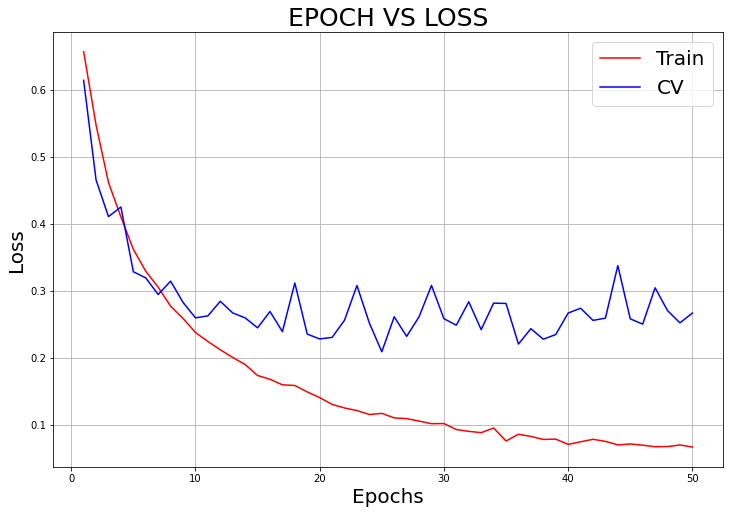

In [16]:
# plotting epoch vs loss
def plotting(epoch, train_loss, CV_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CV_loss, color = 'blue', label = "CV")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

plotting(list(log_frame["Epoch"]), list(log_frame["Train_Loss"]), list(log_frame["CV_Loss"]), "EPOCH VS LOSS") 

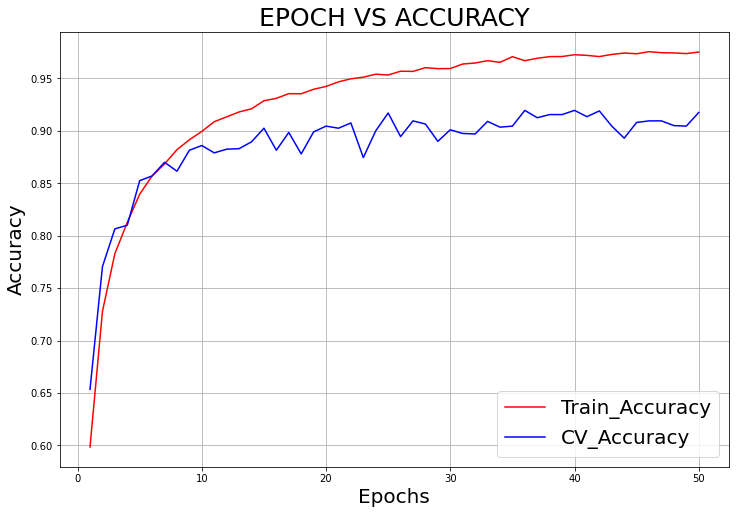

In [17]:
# plotting epoch vs accuracy
def plotting(epoch, train_acc, CV_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CV_acc, color = 'blue', label = "CV_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

plotting(list(log_frame["Epoch"]), list(log_frame["Train_Accuracy"]), list(log_frame["CV_Accuracy"]), "EPOCH VS ACCURACY") 

In [18]:
# predicting on test data
test_predict = model.predict(test_x)

In [19]:
# Since the test_predict is in the form of dummy variable with the value of probability so we will convert it into categorical data
l = []
for i in range(test_predict.shape[0]):
  if test_predict[i] < 0.5:
    j = 0
  else:
    j = 1
  l.append(j)
test_predict = pd.DataFrame(l)

In [20]:
# Accuracy on test data
acc = accuracy_score(test_y, l) * 100
acc

92.7

In [21]:
# Now prediction on data to be predicted
prediction_predict = model.predict(prediction)

In [22]:
# Since the prediction_predict is in the form of dummy variable with the value of probability so we will convert it into categorical data
l = []
for i in range(prediction_predict.shape[0]):
  if prediction_predict[i] < 0.5:
    j = 0
  else:
    j = 1
  l.append(j)
submission2 = pd.DataFrame(l)  
submission2 = submission2.rename(columns = {0 : 'label'})

In [23]:
# loading sample submission file and dropping the falsely labelled column from Sample submission file and clubing it with the predicted file 
submission1 = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
submission1.drop(columns = ['label'], inplace = True)
submission = pd.concat([submission1, submission2], axis = 1)

In [24]:
# Final submission file
submission

,id,label
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
12495,12496,1
12496,12497,1
12497,12498,0
12498,12499,0


it is a cat


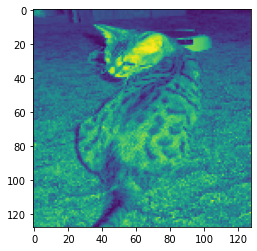

In [25]:
# Validation by image plotting
t = prediction.reshape(12500, 128, 128)
r = 233
plt.imshow(t[r])
if submission["label"][r] == 1:
    print("It is a dog")
else:
    print("it is a cat")

In [26]:
# Delete unwanted output files
import shutil
shutil.rmtree('./train')
shutil.rmtree('./test1')

In [27]:
# Saving the submission file
submission.to_csv('submission.csv', index = False)